# Tensorflow tutorial

Tensorflow is a powerful library for numerical computation, particularly well suited and fine-tuned for large-scale Machine Learning (but you could use it for anything else that requires heavy computations). It was developed by Google Brain Team and it powers many of google's large-scale services such as: Google Cloud, Speech, Photos, Search, ...

It was open sourced in November 2015, and it is now the most popular Deep Learning library (with Pytorch) in terms of citations in papers, adoption in companies, stars on GitHub ecc...

Countless projects use TF for all sorts of ML tasks:
- image classification
- natural language processing
- recommender systems
- time series forecasting
- ...

What TF offer?
- Core similar to numpy, but with GPU support
- Support distributed computing (across multiple devices and servers)
- Includes a kind of JIT compiler (just-in-time) that allows it to optimize computations for speed and memory usage. Ut works by extracting the computation graph from a Python function, then optimizing it (for example by pruning unused nodes), and finally running it efficiently (automatically running iindependent operations in parallel)
- Computation graphs can be exported to a portable format: so you can train a TF model in one environment and run it in another (using Java on an Android device)
- It implements autodiff and provides some excellent optimizers such as RMSProp and Nadaom so you can easily minimize all sorts of loss functions.

Tensorflow website: https://www.tensorflow.org/  
Tensorflow guide: https://www.tensorflow.org/guide  
Tensorflow guide for Keras: https://www.tensorflow.org/guide/keras/overview  

## Why use Tensorflow?

Deep Learning is in very high interest these days - there's a crucial need for rapid and optimized implementations of the algorithms and architectures. TensorFlow is designed to facilitate this goal.

The strong advantage of TensorFlow is it flexibility in designing highly modular models which can also be a disadvantage for beginners since a lot of the pieces must be considered together when creating the model.

This issue has been facilitated as well by developing high-level APIs such as Keras and Slim which abstract a lot of the pieces used in designing machine learning algorithms.

The interesting thing about TensorFlow is that **it can be found anywhere these days**. Lots of the researchers and developers are using it and its community is growing at the speed of light! So many issues can be dealt with easily since they're usually the same issues that a lot of other people run into considering the large number of people involved in the TensorFlow community.

![Tensorflow API](resources/tf_api.png)

## What is Keras? 

Keras is a high-level Deep Learning API that allows you to easily build, train, evaluate and execute all sorts of neural networks.

Website: https://keras.io/  
Documentation: https://keras.io/guides/  
Keras for engineer: https://keras.io/getting_started/intro_to_keras_for_engineers/  
Tensorflow guide for Keras: https://www.tensorflow.org/guide/keras/overview  

Was originally developed by Francois Chollet as part of research project and was released as an open source project in March 2015.  
It quickly gained popularity, owing to its ease of use, flexibility and beautiful design.

To perform the heavy computations required by neural networks, this reference implementation relies on a computation backend.  
At the present you can choose from three popular open source Deep Learning libraries: Tensorflow, Microsoft Cognitive Toolkit (CNTK) and Theano.

Therefore, to avoid any confusion, we will refer to rhis reference implementation as multibackend Keras.

Since 2016, other implementations have been released. You can now run Keras on Apache MXNet, Apple's Core ML, Javascript or Typescript (to run Keras code in a web browser), and PlaidML (which can run on all sorts of GPU devices, not just Nvidia).

Moreover, TensorFlow itself now comes bundled with its own Keras implementation: **tf.keras**

It only support TensorFlow as the backend, but it has the advantage of offering some very usefull extra features: for example it supports TensorFlow Data API, which makes it easy to load and preprocess data efficiently.

In [1]:
import tensorflow as tf
from tensorflow import keras

print(f"TF Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

TF Version: 2.2.0
Keras Version: 2.3.0-tf


## Dive into Tensorflow

Ok now we can start an overview of tensorflow

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(42)

Now that you have imported the library, we will walk you through its different applications. You will start with an example, where we compute for you the loss of one training example. 

$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$

In [10]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

init = tf.global_variables_initializer()         # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss

9


Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are not yet executed/evaluated. 
2. Write operations between those Tensors.
3. Initialize your Tensors. 
4. Create a Session. 
5. Run the Session. This will run the operations you'd written above. 

Therefore, when we created a variable for the loss, we simply defined the loss as a function of other quantities, but did not evaluate its value. To evaluate it, we had to run `init=tf.global_variables_initializer()`. That initialized the loss variable, and in the last line we were finally able to evaluate the value of `loss` and print its value.

Now let us look at an easy example. Run the cell below:

In [11]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


As expected, you will not see 20! You got a tensor saying that the result is a tensor that does not have the shape attribute, and is of type "int32". All you did was put in the 'computation graph', but you have not run this computation yet. In order to actually multiply the two numbers, you will have to create a session and run it.

In [12]:
sess = tf.Session()
print(sess.run(c))

20


Great! To summarize, **remember to initialize your variables, create a session and run the operations inside the session**. 

Next, you'll also have to know about placeholders. A placeholder is an object whose value you can specify only later. 
To specify values for a placeholder, you can pass in values by using a "feed dictionary" (`feed_dict` variable). Below, we created a placeholder for x. This allows us to pass in a number later when we run the session. 

In [13]:
# Change the value of x in the feed_dict

x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


When you first defined `x` you did not have to specify a value for it. A placeholder is simply a variable that you will assign data to only later, when running the session. We say that you **feed data** to these placeholders when running the session. 

Here's what's happening: When you specify the operations needed for a computation, you are telling TensorFlow how to construct a computation graph. The computation graph can have some placeholders whose values you will specify only later. Finally, when you run the session, you are telling TensorFlow to execute the computation graph.

## Dive into Keras

Ok now we can try to use Keras to create a new model

We want to classify images of clothing, like sneakers and shirts using the Fashion-MNIST Dataset

In [14]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [15]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.  
The model is tested against the test set, the test_images, and test_labels arrays.  

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

![Dataset Classes](resources/classes.png)

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
print(f"Train images: {train_images.shape}")
print(f"Test images: {test_images.shape}")


Train images: (60000, 28, 28)
Test images: (10000, 28, 28)


The train set has: 60000 images with 28x28 dimension

#### Preprocess Data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

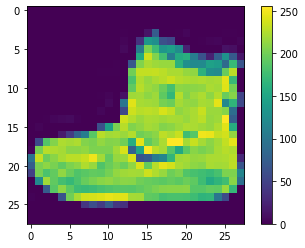

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [25]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

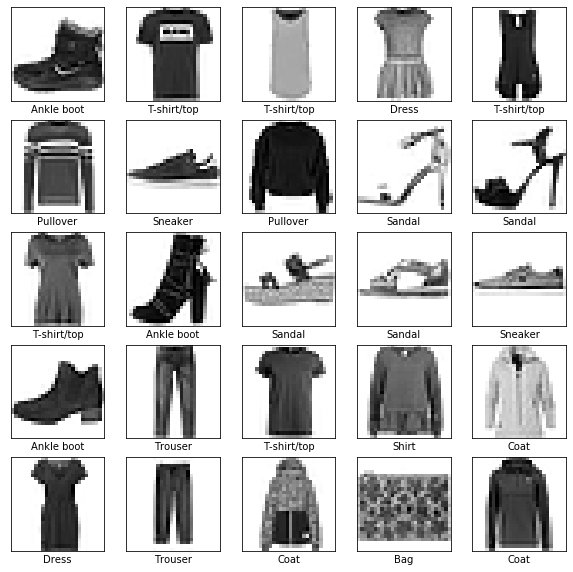

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

**Set up the layers**

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


The first layer in this network, **tf.keras.layers.Flatten**, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).  
Think of this layer as unstacking rows of pixels in the image and lining them up.  
This layer has no parameters to learn; it only reformats the data.


After the pixels are flattened, the network consists of a sequence of two **tf.keras.layers.Dense** layers.  
These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

#### Compile the model

Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- **Loss function** = This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- **Optimizer** = This is how the model is updated based on the data it sees and its loss function.
- **Metrics** = Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.

In [29]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4989 - acc: 0.8239
Epoch 2/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3769 - acc: 0.8647
Epoch 3/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3364 - acc: 0.8784
Epoch 4/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3141 - acc: 0.8852
Epoch 5/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2950 - acc: 0.8915
Epoch 6/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2819 - acc: 0.89490s - loss: 0.2819 - acc: 0.895
Epoch 7/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2702 - acc: 0.8998
Epoch 8/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2571 - acc: 0.9037
Epoch 9/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2491 - acc: 0.9067
Epoch 10/10
60000/60000 [====

#### Evaluate Accuracy (training and test)


In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3301 - acc: 0.8833

Test accuracy: 0.8833


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy represents overfitting. 

Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. 

An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

If you want to have much more informations about overfitting problems and how to deal with it with TF, check this link: https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting

#### Make Predictions

With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [34]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [35]:
predictions[0]

array([1.7749937e-06, 6.6445187e-07, 2.9372836e-07, 2.3048482e-08,
       6.6613759e-09, 1.9232770e-04, 4.3076605e-07, 2.2606398e-03,
       5.0686890e-07, 9.9754333e-01], dtype=float32)

A prediction is an array of 10 numbers (one for every classes that you use). 

They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [37]:
#Predicted Label
np.argmax(predictions[0])

9

In [38]:
#Original Label
test_labels[0]

9

#### Verify Predictions (What if test)

In [41]:

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


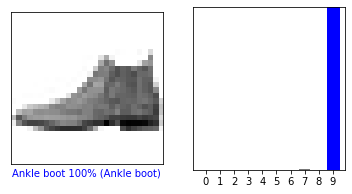

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

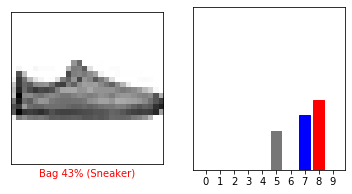

In [43]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()



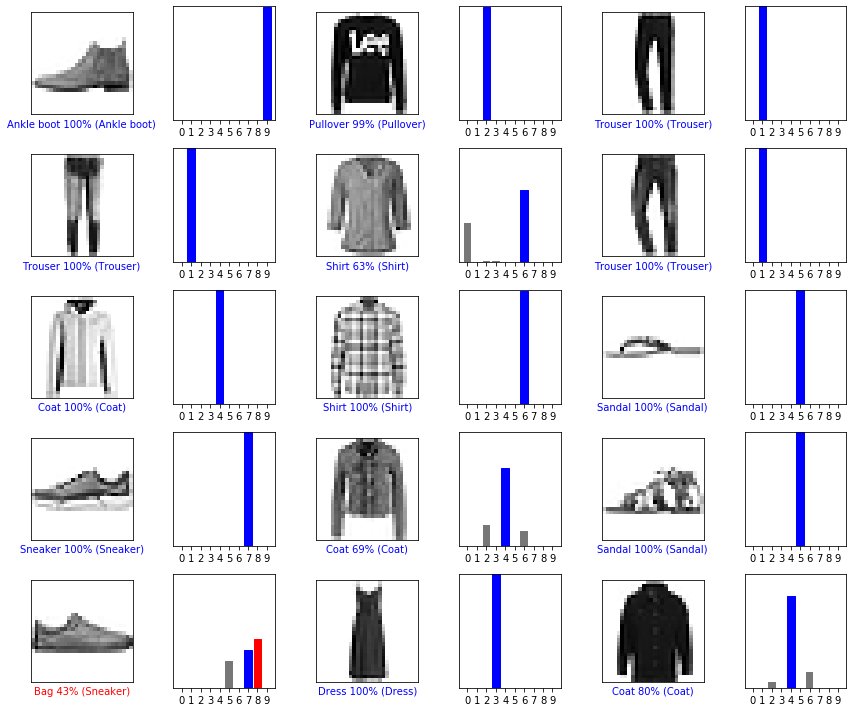

In [44]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Regression Keras Experiment

In a regression problem, we aim to predict the output of a continuous value, like a price or a probability. Contrast this with a classification problem, where we aim to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This notebook uses the classic Auto MPG Dataset and builds a model to predict the fuel efficiency of late-1970s and early 1980s automobiles. To do this, we'll provide the model with a description of many automobiles from that time period. This description includes attributes like: cylinders, displacement, horsepower, and weight.  
https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [46]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling

1.15.0


In [48]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
print(f"Dataset shape: {dataset.shape}")
dataset.tail()

Dataset shape: (398, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


#### Clean the dataset
The dataset contains few unknown values.

In [51]:
dataset.isna().sum()
dataset = dataset.dropna()

#Convert origin variable with hand mapping
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

#Transform categorical into numeric
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82
397,31.0,4,119.0,82.0,2720.0,19.4,82


#### Split the data

In [53]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### Visualizare the data

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


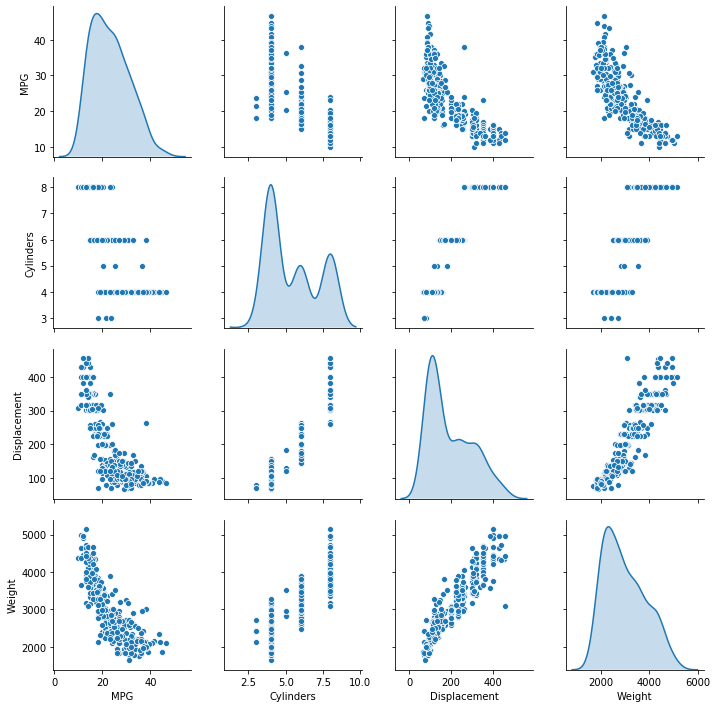

In [55]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [56]:
#Loog some statistics
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


#### Separate the labels

In [57]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

#### Normalize the data (mean zero, variance 1)


In [60]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

#### Build the model

Let's build our model. Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [62]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [63]:
model = build_model()

In [65]:
#Inspect the model definition
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [70]:
#TRAIN THE MODEL
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)
  #callbacks=[tfdocs.modeling.EpochDots()])

In [75]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 9.6439 - mean_absolute_error: 2.4554 - mean_squared_error: 9.6439
Testing set Mean Abs Error:  2.46 MPG


In [71]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.718330,1.097867,2.718331,11.211380,2.564906,11.211379,995
996,2.221632,0.971408,2.221632,11.756386,2.603406,11.756387,996
997,2.345265,0.917313,2.345264,11.305996,2.575282,11.305996,997
998,2.209737,0.945782,2.209737,13.668776,2.655309,13.668776,998
999,2.756142,1.059633,2.756142,14.895560,2.837233,14.895560,999


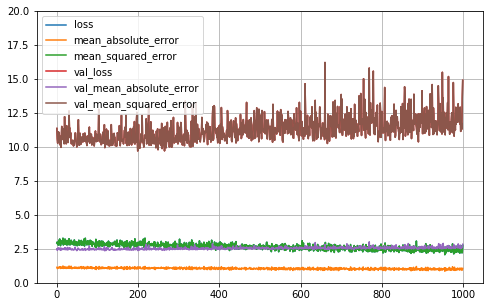

In [89]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 20)
    plt.show()
    
plot_learning_curves(history)

#### Make Predictions

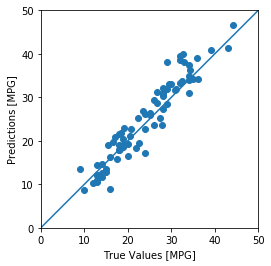

In [73]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


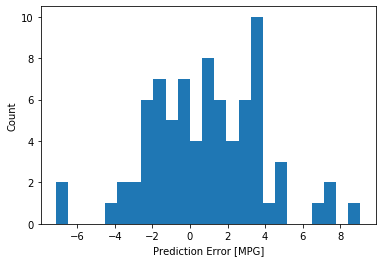

In [74]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In the scatterplot it looks like our model predicts reasonably well. Let's take a look at the error distribution.

But visualizing the errors we see that are not quite gaussian, but we might expect that because the number of samples is very small.

We can see that in prediction are some overfitting.

You can use the early stopping layer to reduce the overfitting of the model

In [76]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0)

In [77]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 6.6461 - mean_absolute_error: 2.0704 - mean_squared_error: 6.6461
Testing set Mean Abs Error:  2.07 MPG


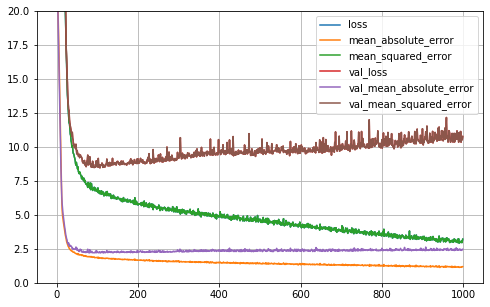

In [88]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 20)
    plt.show()
    
plot_learning_curves(early_history)

## Import and Manipulate Data

TensorFlow provides very efficient libraries to load and manipulate data, different from those seen so far

Please follow this link to better understand how tensorflow data works: https://www.tensorflow.org/guide/data

## CSV

In [2]:
import functools

import numpy as np
import tensorflow as tf


# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

You can load this using pandas, and pass the NumPy arrays to TensorFlow. If you need to scale up to a large set of files, or need a loader that integrates with TensorFlow and tf.data then use the tf.data.experimental.make_csv_dataset function:

The only column you need to identify explicitly is the one with the value that the model is intended to predict.

In [4]:
LABEL_COLUMN = 'survived'
LABELS = [0, 1]

In [5]:
def get_dataset(file_path, **kwargs):
    dataset = tf.data.experimental.make_csv_dataset(
        file_path,
        batch_size=5, # Artificially small to make examples easier to show.
        label_name=LABEL_COLUMN,
        na_value="?",
        num_epochs=1,
        ignore_errors=True, 
        **kwargs)
    return dataset

raw_train_data = get_dataset(train_file_path)
raw_test_data = get_dataset(test_file_path)

In [6]:
def show_batch(dataset):
    for batch, label in dataset.take(1):
        for key, value in batch.items():
            print("{:20s}: {}".format(key,value.numpy()))

Each item in the dataset is a batch, represented as a tuple of (many examples, many labels). The data from the examples is organized in column-based tensors (rather than row-based tensors), each with as many elements as the batch size (5 in this case).

It might help to see this yourself.

In [7]:
show_batch(raw_train_data)

sex                 : [b'male' b'male' b'female' b'male' b'female']
age                 : [16. 28. 28. 33.  2.]
n_siblings_spouses  : [4 0 1 1 1]
parch               : [1 0 0 1 1]
fare                : [39.688  7.229 24.    20.525 26.   ]
class               : [b'Third' b'Third' b'Second' b'Third' b'Second']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Cherbourg' b'Cherbourg' b'Southampton' b'Southampton']
alone               : [b'n' b'y' b'n' b'n' b'n']


As you can see, the columns in the CSV are named. The dataset constructor will pick these names up automatically. If the file you are working with does not contain the column names in the first line, pass them in a list of strings to the column_names argument in the make_csv_dataset function.

In [8]:
CSV_COLUMNS = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

temp_dataset = get_dataset(train_file_path, column_names=CSV_COLUMNS)

show_batch(temp_dataset)

sex                 : [b'male' b'male' b'female' b'male' b'male']
age                 : [34.  45.  35.  45.  32.5]
n_siblings_spouses  : [1 1 0 0 1]
parch               : [1 0 0 0 0]
fare                : [ 14.4    83.475 135.633  26.55   30.071]
class               : [b'Third' b'First' b'First' b'First' b'Second']
deck                : [b'unknown' b'C' b'C' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Southampton' b'Cherbourg']
alone               : [b'n' b'n' b'y' b'y' b'n']


This example is going to use all the available columns. If you need to omit some columns from the dataset, create a list of just the columns you plan to use, and pass it into the (optional) select_columns argument of the constructor.

In [9]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'class', 'deck', 'alone']

temp_dataset = get_dataset(train_file_path, select_columns=SELECT_COLUMNS)

show_batch(temp_dataset)

age                 : [ 2. 20. 28. 22. 23.]
n_siblings_spouses  : [3 0 1 1 0]
class               : [b'Third' b'Third' b'Third' b'Second' b'Second']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'D']
alone               : [b'n' b'y' b'n' b'n' b'y']


## Numpy

Tensorflow is written directly with numpy, so it's easy to import and manipulate numpy arrays.

In [ ]:
import numpy as np
import tensorflow as tf

In [10]:
#Load from .npz file
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
    train_examples = data['x_train']
    train_labels = data['y_train']
    test_examples = data['x_test']
    test_labels = data['y_test']

11493376/11490434 [==============================] - 2s 0us/step


**From numpy to tensorflow data**

Assuming you have an array of examples and a corresponding array of labels, pass the two arrays as a tuple into tf.data.Dataset.from_tensor_slices to create a tf.data.Dataset.

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

Then it's easy to work inside keras and tensorflow with this new dataset, for example

In [12]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

## Pandas

For this example we use this dataset: https://archive.ics.uci.edu/ml/datasets/heart+Disease

In [15]:
import pandas as pd

In [17]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/applied-dl/heart.csv')
df = pd.read_csv(csv_file)
print(f"Dataframe shape: {df.shape}")
print(df.dtypes)
df.head()

Dataframe shape: (303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [20]:
# Convert thal column which is an object in the dataframe to a discrete numerical value.
df['thal'] = pd.Categorical(df['thal'])
df['thal'] = df.thal.cat.codes
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


Use tf.data.Dataset.from_tensor_slices to read the values from a pandas dataframe.

One of the advantages of using tf.data.Dataset is it allows you to write simple, highly efficient data pipelines.

In [21]:
target = df.pop('target')

dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

for feat, targ in dataset.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
   2. ], Target: 0
Features: [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
   3. ], Target: 1
Features: [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
   4. ], Target: 0
Features: [ 37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   3.    0.
   3. ], Target: 0
Features: [ 41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1.    0.
   3. ], Target: 0


Since a pd.Series implements the __array__ protocol it can be used transparently nearly anywhere you would use a np.array or a tf.Tensor.

In [22]:
tf.constant(df['thal'])

<tf.Tensor: shape=(303,), dtype=int8, numpy=
array([2, 3, 4, 3, 3, 3, 3, 3, 4, 4, 2, 3, 2, 4, 4, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 2, 4, 3, 4, 3, 4, 4,
       2, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4,
       4, 2, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4,
       3, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4,
       3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 2, 4, 4, 2, 3, 3, 4, 4, 3, 4,
       3, 3, 4, 2, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 2,
       4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 4, 3, 4, 2, 4, 3,
       3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4, 3, 2, 4, 3, 3, 2,
       4, 4, 4, 4, 3, 0, 3, 3, 3, 3, 1, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3,
      

In [23]:
#Shuffle and batch the dataset
train_dataset = dataset.shuffle(len(df)).batch(1)

Please check this much more complete example: https://www.tensorflow.org/tutorials/structured_data/feature_columns

An alternative to feature column = https://www.tensorflow.org/tutorials/load_data/pandas_dataframe#alternative_to_feature_columns

## Data Preprocessing

### Continous Data

If your data is already in an appropriate numeric format, you can pack the data into a vector before passing it off to the model:

In [30]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare']
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]
temp_dataset = get_dataset(train_file_path, 
                           select_columns=SELECT_COLUMNS,
                           column_defaults = DEFAULTS)

show_batch(temp_dataset)
example_batch, labels_batch = next(iter(temp_dataset)) 

print(f"\nExample batch: {example_batch}")
print(f"\nLabels batch: {labels_batch}")

age                 : [40. 33. 43. 47.  2.]
n_siblings_spouses  : [0. 0. 0. 0. 3.]
parch               : [0. 2. 0. 0. 1.]
fare                : [13.    26.     8.05  25.587 21.075]

Example batch: OrderedDict([('age', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([22., 30., 51., 28., 28.], dtype=float32)>), ('n_siblings_spouses', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 0., 0., 0.], dtype=float32)>), ('parch', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 1., 0., 0.], dtype=float32)>), ('fare', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 7.125, 16.1  , 61.379,  7.75 ,  7.75 ], dtype=float32)>)])

Labels batch: [0 0 0 1 0]


Here's a simple function that will pack together all the columns
You can apply this to each element of the dataset

In [31]:
def pack(features, label):
    return tf.stack(list(features.values()), axis=-1), label

packed_dataset = temp_dataset.map(pack)

for features, labels in packed_dataset.take(1):
    print(features.numpy())
    print()
    print(labels.numpy())

[[31.     0.     0.     7.775]
 [28.     0.     0.    10.5  ]
 [30.     0.     0.    93.5  ]
 [23.     0.     0.    13.792]
 [33.     0.     0.     5.   ]]

[0 0 1 1 0]


If you have mixed datatypes you may want to separate out these simple-numeric fields. The tf.feature_column api can handle them, but this incurs some overhead and should be avoided unless really necessary. Switch back to the mixed dataset:

In [32]:
show_batch(raw_train_data)

sex                 : [b'male' b'male' b'female' b'female' b'female']
age                 : [27. 34. 21. 48. 31.]
n_siblings_spouses  : [0 0 2 1 1]
parch               : [0 0 2 2 0]
fare                : [ 26.     13.    262.375  65.     18.   ]
class               : [b'Second' b'Second' b'First' b'Second' b'Third']
deck                : [b'unknown' b'unknown' b'B' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Cherbourg' b'Southampton' b'Southampton']
alone               : [b'y' b'y' b'n' b'n' b'n']


In [33]:
example_batch, labels_batch = next(iter(temp_dataset)) 

So define a more general preprocessor that selects a list of numeric features and packs them into a single column

In [35]:
class PackNumericFeatures(object):
    def __init__(self, names):
        self.names = names

    def __call__(self, features, labels):
        numeric_features = [features.pop(name) for name in self.names]
        numeric_features = [tf.cast(feat, tf.float32) for feat in numeric_features]
        numeric_features = tf.stack(numeric_features, axis=-1)
        features['numeric'] = numeric_features

        return features, labels

In [37]:
NUMERIC_FEATURES = ['age','n_siblings_spouses','parch', 'fare']

packed_train_data = raw_train_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

packed_test_data = raw_test_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

show_batch(packed_train_data)

example_batch, labels_batch = next(iter(packed_train_data)) 

sex                 : [b'male' b'female' b'male' b'female' b'male']
class               : [b'Third' b'Third' b'Third' b'Third' b'Third']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Cherbourg' b'Southampton' b'Southampton' b'Queenstown']
alone               : [b'y' b'y' b'y' b'y' b'y']
numeric             : [[23.     0.     0.     7.854]
 [28.     0.     0.     7.229]
 [26.     0.     0.    56.496]
 [31.     0.     0.     8.683]
 [28.     0.     0.     6.858]]


### Data Normalization

Continuous data should always be normalized in Deep Learning expecially

In [39]:
import pandas as pd
desc = pd.read_csv(train_file_path)[NUMERIC_FEATURES].describe()
desc

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [40]:
MEAN = np.array(desc.T['mean'])
STD = np.array(desc.T['std'])

In [41]:
def normalize_numeric_data(data, mean, std):
    # Center the data
    return (data-mean)/std


Now create a numeric column. The tf.feature_columns.numeric_column API accepts a normalizer_fn argument, which will be run on each batch.

Bind the MEAN and STD to the normalizer fn using functools.partial.

In [42]:
# See what you just created.
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)

numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer, shape=[len(NUMERIC_FEATURES)])
numeric_columns = [numeric_column]
numeric_column

NumericColumn(key='numeric', shape=(4,), default_value=None, dtype=tf.float32, normalizer_fn=functools.partial(<function normalize_numeric_data at 0x14114f730>, mean=array([29.631,  0.545,  0.38 , 34.385]), std=array([12.512,  1.151,  0.793, 54.598])))

When you train the model, include this feature column to select and center this block of numeric data:

In [43]:
example_batch['numeric']

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[33.   ,  0.   ,  0.   ,  9.5  ],
       [ 2.   ,  0.   ,  1.   , 12.288],
       [50.   ,  0.   ,  0.   , 28.712],
       [28.   ,  1.   ,  0.   , 15.5  ],
       [28.   ,  1.   ,  2.   , 23.45 ]], dtype=float32)>

In [44]:
numeric_layer = tf.keras.layers.DenseFeatures(numeric_columns)
numeric_layer(example_batch).numpy()

array([[ 0.269, -0.474, -0.479, -0.456],
       [-2.208, -0.474,  0.782, -0.405],
       [ 1.628, -0.474, -0.479, -0.104],
       [-0.13 ,  0.395, -0.479, -0.346],
       [-0.13 ,  0.395,  2.043, -0.2  ]], dtype=float32)

The mean based normalization used here requires knowing the means of each column ahead of time.

### Categorical Data

Some of the columns in the CSV data are categorical columns. That is, the content should be one of a limited set of options.

Use the tf.feature_column API to create a collection with a tf.feature_column.indicator_column for each categorical column.

In [45]:
CATEGORIES = {
    'sex': ['male', 'female'],
    'class' : ['First', 'Second', 'Third'],
    'deck' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'embark_town' : ['Cherbourg', 'Southhampton', 'Queenstown'],
    'alone' : ['y', 'n']
}


In [47]:
categorical_columns = []
for feature, vocab in CATEGORIES.items():
    cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
            key=feature, vocabulary_list=vocab)
    categorical_columns.append(tf.feature_column.indicator_column(cat_col))

In [48]:
# See what you just created.
categorical_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('First', 'Second', 'Third'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Cherbourg', 'Southhampton', 'Queenstown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='alone', vocabulary_list=('y', 'n'), dtype=tf.string, default_value=-1, num_oov_buckets=0))]

In [49]:
categorical_layer = tf.keras.layers.DenseFeatures(categorical_columns)
print(categorical_layer(example_batch).numpy()[0])

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


#### Combined preprocessing layer
Like Scikit-learn with the pipe, in TF it's possibile to combine operations for sequentially execution.  
In TF works better because you can create a computational graph of instructions.  
Add the two feature column collections and pass them to a tf.keras.layers.DenseFeatures to create an input layer that will extract and preprocess both input types:

In [50]:
preprocessing_layer = tf.keras.layers.DenseFeatures(categorical_columns+numeric_columns)
print(preprocessing_layer(example_batch).numpy()[0])

[ 1.     0.     0.     0.     1.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.269 -0.474
 -0.479 -0.456  1.     0.   ]


## TF Record

https://www.tensorflow.org/tutorials/load_data/tfrecord

To read data efficiently it can be helpful to serialize your data and store it in a set of files (100-200MB each) that can each be read linearly. This is especially true if the data is being streamed over a network. This can also be useful for caching any data-preprocessing.

The TFRecord format is a simple format for storing a sequence of binary records.

Protocol buffers are a cross-platform, cross-language library for efficient serialization of structured data.

Protocol messages are defined by .proto files, these are often the easiest way to understand a message type.

The tf.Example message (or protobuf) is a flexible message type that represents a {"string": value} mapping. It is designed for use with TensorFlow and is used throughout the higher-level APIs such as TFX.